<a href="https://colab.research.google.com/github/pratikjori20/Appliance-Energy-Prediction/blob/main/Individual_capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <B> Appliance Energy Prediction
Data-driven prediction of energy use of appliances
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

In [1]:
# Import all necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/Copy of data_application_energy.csv"
df = pd.read_csv(path, parse_dates=['date'])

In [4]:
df

date  Appliances  lights         T1       RH_1  \
0     2016-01-11 17:00:00          60      30  19.890000  47.596667   
1     2016-01-11 17:10:00          60      30  19.890000  46.693333   
2     2016-01-11 17:20:00          50      30  19.890000  46.300000   
3     2016-01-11 17:30:00          50      40  19.890000  46.066667   
4     2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                   ...         ...     ...        ...        ...   
19730 2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731 2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732 2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733 2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734 2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

In [5]:
df.shape

(19735, 29)

In [6]:
df_1 = df
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [7]:
# Set the date index
df = df.set_index('date')

In [8]:
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Week'] = df.index.week

In [9]:
df.head(10)

Appliances  lights         T1       RH_1     T2  \
date                                                                   
2016-01-11 17:00:00          60      30  19.890000  47.596667  19.20   
2016-01-11 17:10:00          60      30  19.890000  46.693333  19.20   
2016-01-11 17:20:00          50      30  19.890000  46.300000  19.20   
2016-01-11 17:30:00          50      40  19.890000  46.066667  19.20   
2016-01-11 17:40:00          60      40  19.890000  46.333333  19.20   
2016-01-11 17:50:00          50      40  19.890000  46.026667  19.20   
2016-01-11 18:00:00          60      50  19.890000  45.766667  19.20   
2016-01-11 18:10:00          60      50  19.856667  45.560000  19.20   
2016-01-11 18:20:00          60      40  19.790000  45.597500  19.20   
2016-01-11 18:30:00          70      40  19.856667  46.090000  19.23   

                          RH_2     T3       RH_3         T4       RH_4  ...  \
date                                                                    ...   
2016-01-11 17:00:00  44.790000  19.79  44.730000  19.000000  45.566667  ...   
2016-01-11 17:10:00  44.722500  19.79  44.790000  19.000000  45.992500  ...   
2016-01-11 17:20:00  44.626667  19.79  44.933333  18.926667  45.890000  ...   
2016-01-11 17:30:00  44.590000  19.79  45.000000  18.890000  45.723333  ...   
2016-01-11 17:40:00  44.530000  19.79  45.000000  18.890000  45.530000  ...   
2016-01-11 17:50:00  44.500000  19.79  44.933333  18.890000  45.730000  ...   
2016-01-11 18:00:00  44.500000  19.79  44.900000  18.890000  45.790000  ...   
2016-01-11 18:10:00  44.500000  19.73  44.900000  18.890000  45.863333  ...   
2016-01-11 18:20:00  44.433333  19.73  44.790000  18.890000  45.790000  ...   
2016-01-11 18:30:00  44.400000  19.79  44.863333  18.890000  46.096667  ...   

                     Windspeed  Visibility  Tdewpoint        rv1        rv2  \
date                                                                          
2016-01-11 17:00:00   7.000000   63.000000   5.300000  13.275433  13.275433   
2016-01-11 17:10:00   6.666667   59.166667   5.200000  18.606195  18.606195   
2016-01-11 17:20:00   6.333333   55.333333   5.100000  28.642668  28.642668   
2016-01-11 17:30:00   6.000000   51.500000   5.000000  45.410389  45.410389   
2016-01-11 17:40:00   5.666667   47.666667   4.900000  10.084097  10.084097   
2016-01-11 17:50:00   5.333333   43.833333   4.800000  44.919484  44.919484   
2016-01-11 18:00:00   5.000000   40.000000   4.700000  47.233763  47.233763   
2016-01-11 18:10:00   5.166667   40.000000   4.683333  33.039890  33.039890   
2016-01-11 18:20:00   5.333333   40.000000   4.666667  31.455702  31.455702   
2016-01-11 18:30:00   5.500000   40.000000   4.650000   3.089314   3.089314   

                     Month  Weekday  Day  Hour  Week  
date                                                  
2016-01-11 17:00:00      1        0   11    17     2  
2016-01-11 17:10:00      1        0   11    17     2  
2016-01-11 17:20:00      1        0   11    17     2  
2016-01-11 17:30:00      1        0   11    17     2  
2016-01-11 17:40:00      1        0   11    17     2  
2016-01-11 17:50:00      1        0   11    17     2  
2016-01-11 18:00:00      1        0   11    18     2  
2016-01-11 18:10:00      1        0   11    18     2  
2016-01-11 18:20:00      1        0   11    18     2  
2016-01-11 18:30:00      1        0   11    18     2  

[10 rows x 33 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [11]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...     Windspeed    Visibility     Tdewpoint           rv1  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...      4.039752     38.330834      3.760707     24.988033   
std    ...      2.451221     11.794719      4.194648     14.496634   
min    ...      0.000000      1.000000     -6.600000      0.005322   
25%    ...      2.000000     29.000000      0.900000     12.497889   
50%    ...      3.666667     40.000000      3.433333     24.897653   
75%    ...      5.500000     40.000000      6.566667     37.583769   
max    ...     14.000000     66.000000     15.500000     49.996530   

                rv2         Month       Weekday           Day          Hour  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      24.988033      3.101647      2.977249     16.057411     11.502002   
std       14.496634      1.339200      1.985617      8.450998      6.921953   
min        0.005322      1.000000      0.000000      1.000000      0.000000   
25%       12.497889      2.000000      1.000000      9.000000      6.000000   
50%       24.897653      3.000000      3.000000     16.000000     12.000000   
75%       37.583769      4.000000      5.000000     23.000000     17.000000   
max       49.996530      5.000000      6.000000     31.000000     23.000000   

               Week  
count  19735.000000  
mean      11.393615  
std        5.657985  
min        2.000000  
25%        6.000000  
50%       11.000000  
75%       16.000000  
max       21.000000  

[8 rows x 33 columns]

In [12]:
df.shape

(19735, 33)

In [13]:
# Checking for null values

df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
Month          0
Weekday        0
Day            0
Hour           0
Week           0
dtype: int64

In [14]:
visData = go.Scatter(x = df_1.date, mode = 'lines', y = df_1.Appliances)
layout = go.Layout(title = 'Appliance energy consumption measurement', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [15]:
df_1['WEEKDAY'] = ((pd.to_datetime(df_1['date']).dt.dayofweek)// 5 == 1).astype(float)
df_1['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [16]:
a_weekday = df_1[df_1['WEEKDAY'] == 0]
visData = go.Scatter(x = a_weekday.date, mode = "lines", y = a_weekday.Appliances)
layout = go.Layout(title = 'Appliance Energy Consumption Measurment on Weekdays', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [17]:
a_weekend = df_1[df_1['WEEKDAY'] == 1]
visData = go.Scatter(x = a_weekend.date, mode = "lines", y = a_weekend.Appliances)
layout = go.Layout(title = 'Appliance Energy Consumption Measurment on Weekends', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [18]:
def daily(x, energy_df=df):
  return energy_df.groupby('Weekday')[x].mean()

def hourly(x, energy_df=df):
  return energy_df.groupby('Hour')[x].mean()

def monthly_daily(x, energy_df=df):
  by_day = energy_df.pivot_table(index='Weekday', columns=['Month'], values=x, aggfunc='mean')
  return round(by_day, ndigits=2)

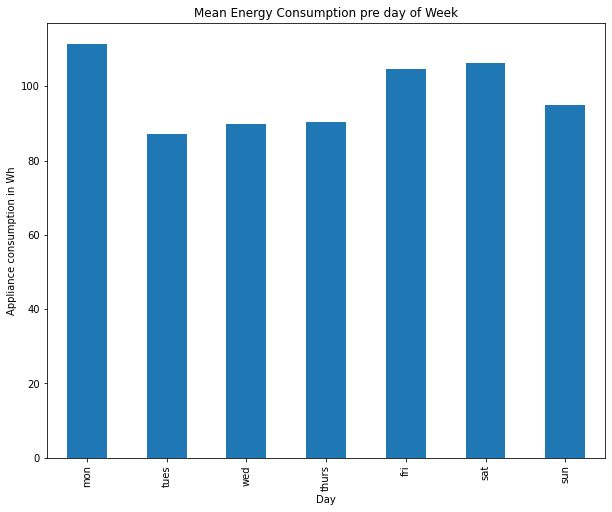

In [19]:
daily('Appliances').plot(kind = 'bar', figsize = (10,8))
ticks = list(range(0,7,1))
labels = "mon tues wed thurs fri sat sun".split()
plt.xlabel('Day')
plt.ylabel('Appliance consumption in Wh')
plt.title('Mean Energy Consumption pre day of Week')
plt.xticks(ticks, labels);

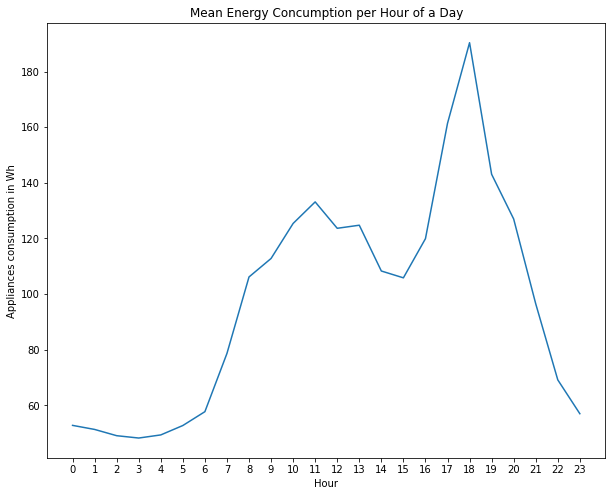

In [20]:
hourly('Appliances').plot(figsize = (10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0,24,1))
plt.title('Mean Energy Concumption per Hour of a Day')
plt.xticks(ticks);

In [21]:
df_1.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'WEEKDAY'],
      dtype='object')

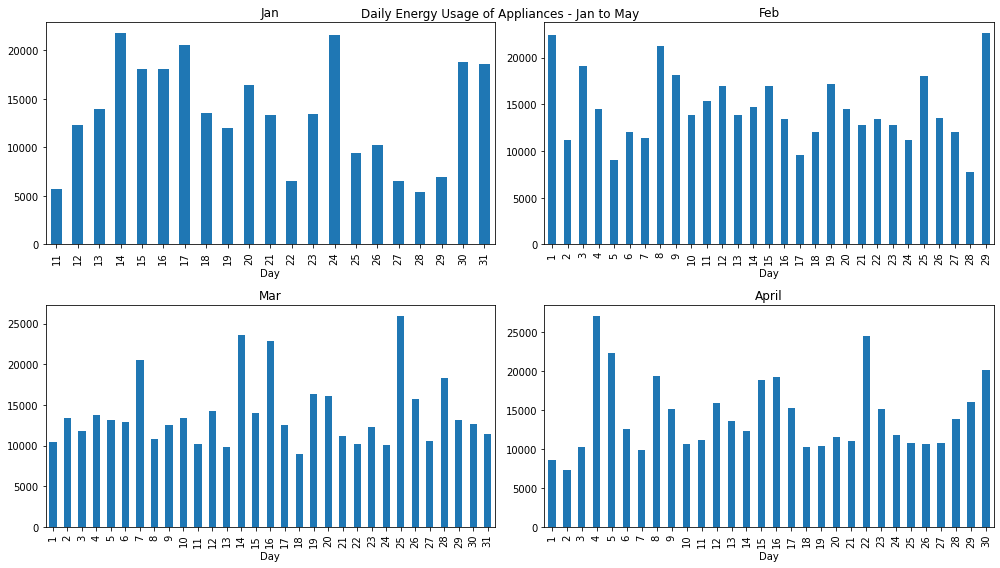

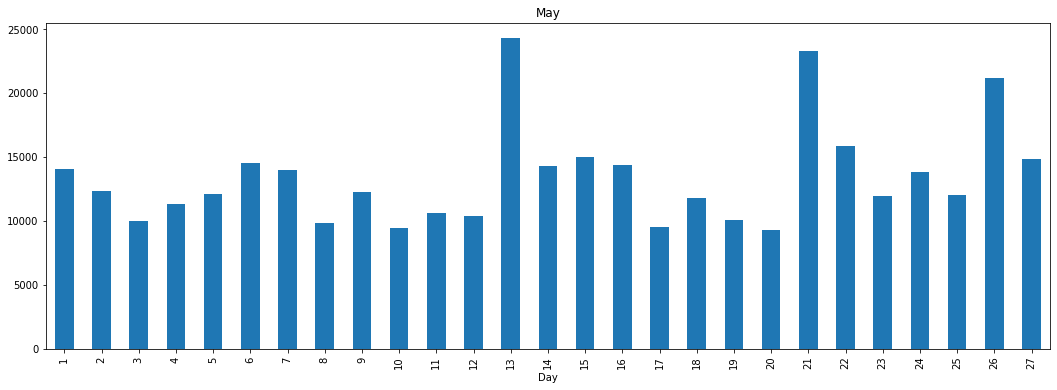

In [22]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
ax = ax.flatten()
months =['Jan', 'Feb', 'Mar', 'April']
for i in range(1,5):
  df.query(f"Month == {i}")[['Day','Appliances']].groupby('Day')['Appliances'].sum().plot.bar(ax=ax[i-1], title = months[i-1])

plt.suptitle('Daily Energy Usage of Appliances - Jan to May')
plt.tight_layout()
plt.show()

plt.figure(figsize = (18,6))
df.query("Month == 5")[['Day','Appliances']].groupby('Day')['Appliances'].sum().plot.bar(title = 'May')
plt.show()

The number of the 0, 1% top values of appliances' load is 19 and they have power load higher than 790 Wh


Text(0.5, 1.0, 'Appliances energy consumption distribution')

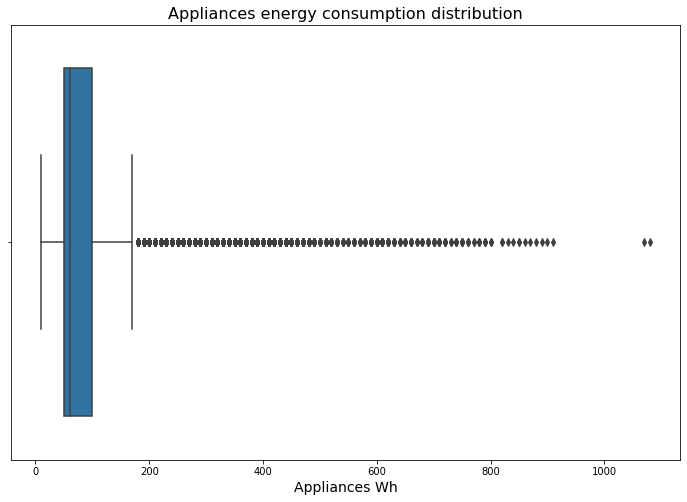

In [23]:
sorted_appliances = df.sort_values('Appliances', ascending = False)
print("The number of the 0, 1% top values of appliances' load is", len(sorted_appliances.head(len(sorted_appliances)//1000)), "and they have power load higher than", sorted_appliances.Appliances[19], "Wh")

plt.figure(figsize =(12,8))
sns.boxplot(x='Appliances', data=df)
plt.xlabel('Appliances Wh', fontsize=14)
plt.title('Appliances energy consumption distribution', fontsize=16)

In [24]:
drop_df = df.drop(df[(df.Appliances>790)|(df.Appliances<0)].index)
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19718 non-null  int64  
 1   lights       19718 non-null  int64  
 2   T1           19718 non-null  float64
 3   RH_1         19718 non-null  float64
 4   T2           19718 non-null  float64
 5   RH_2         19718 non-null  float64
 6   T3           19718 non-null  float64
 7   RH_3         19718 non-null  float64
 8   T4           19718 non-null  float64
 9   RH_4         19718 non-null  float64
 10  T5           19718 non-null  float64
 11  RH_5         19718 non-null  float64
 12  T6           19718 non-null  float64
 13  RH_6         19718 non-null  float64
 14  T7           19718 non-null  float64
 15  RH_7         19718 non-null  float64
 16  T8           19718 non-null  float64
 17  RH_8         19718 non-null  float64
 18  T9         

In [25]:
drop_df = drop_df.drop('Month', axis=1)
drop_df = drop_df.drop('Weekday', axis=1)
drop_df = drop_df.drop('Week', axis=1)

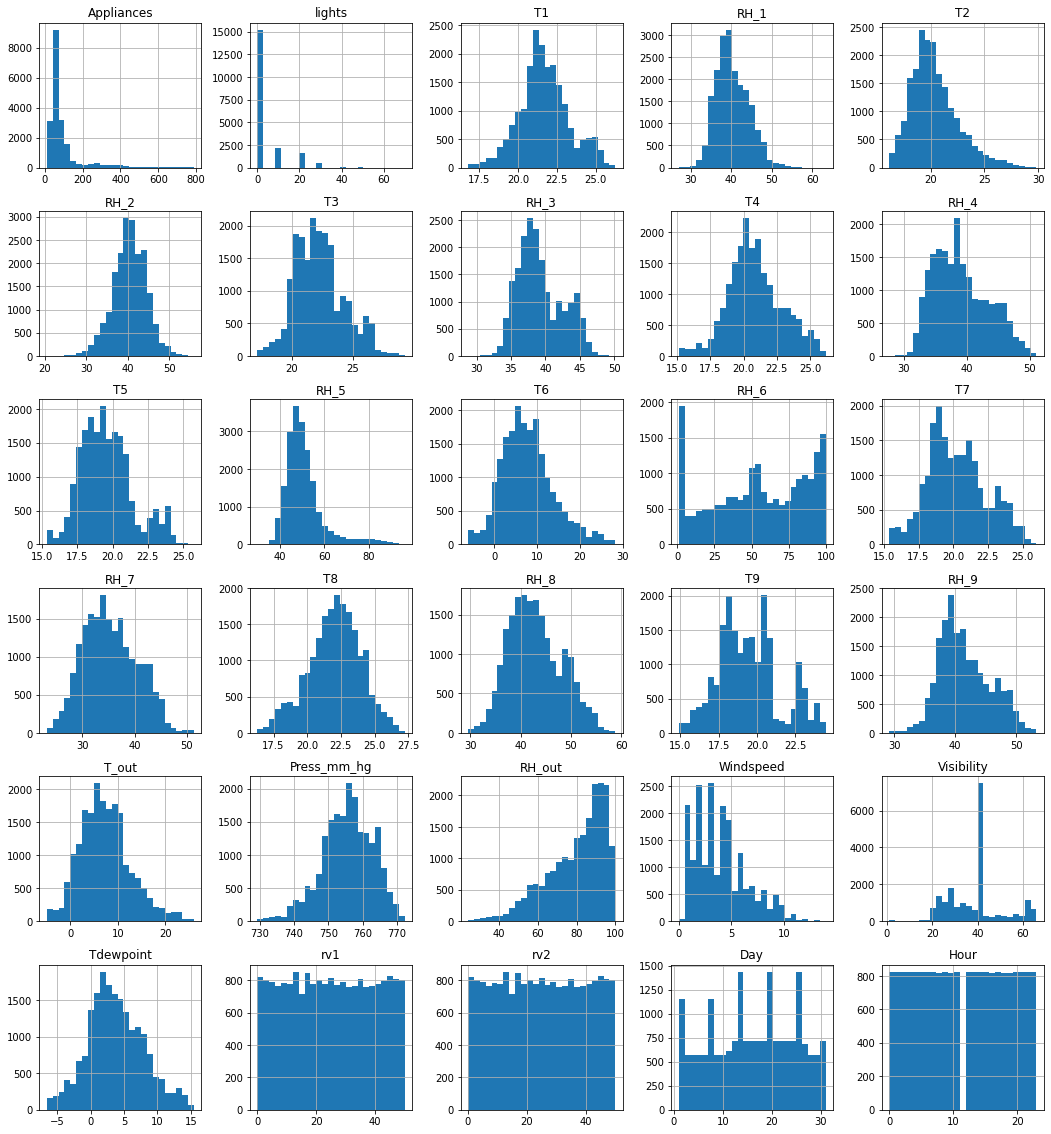

In [26]:
drop_df.hist(bins = 25, figsize = (18,20));

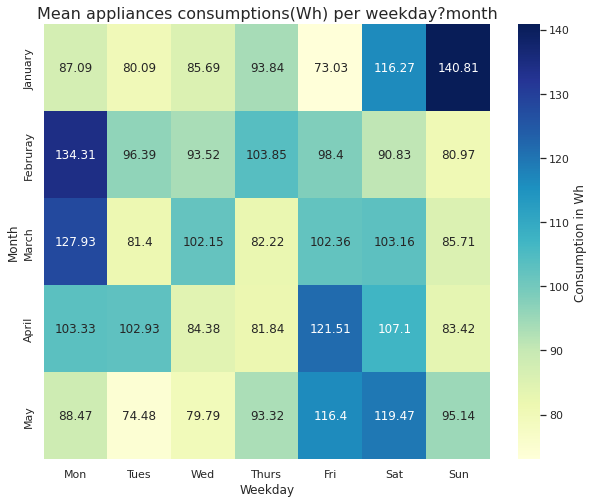

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.heatmap(monthly_daily('Appliances').T,cmap='YlGnBu',
                 xticklabels= 'Mon Tues Wed Thurs Fri Sat Sun'.split(),
                 yticklabels= 'January Februray March April May'.split(),
                 annot=True, fmt='g',
                 cbar_kws= {'label': 'Consumption in Wh'}).set_title('Mean appliances consumptions(Wh) per weekday?month').set_fontsize('16')
plt.show()

In [28]:
drop_df.corr()

Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances     1.000000  0.198201  0.058996  0.087890  0.122590 -0.058680   
lights         0.198201  1.000000 -0.022727  0.107266 -0.004990  0.051428   
T1             0.058996 -0.022727  1.000000  0.163976  0.836827 -0.002565   
RH_1           0.087890  0.107266  0.163976  1.000000  0.269801  0.797675   
T2             0.122590 -0.004990  0.836827  0.269801  1.000000 -0.165586   
RH_2          -0.058680  0.051428 -0.002565  0.797675 -0.165586  1.000000   
T3             0.088211 -0.096397  0.892423  0.253182  0.735194  0.137318   
RH_3           0.037644  0.131253 -0.028357  0.844803  0.121740  0.678418   
T4             0.043280 -0.008049  0.876984  0.105981  0.761939 -0.047445   
RH_4           0.017365  0.115113  0.098001  0.880435  0.231678  0.721560   
T5             0.023048 -0.078044  0.885198  0.205852  0.720483  0.110415   
RH_5           0.010296  0.141706 -0.014878  0.303246  0.029624  0.250066   
T6             0.121284 -0.078204  0.654770  0.315978  0.801244 -0.009877   
RH_6          -0.086414  0.152968 -0.614825  0.245514 -0.580134  0.390321   
T7             0.028316 -0.134699  0.838569  0.021305  0.663438 -0.051459   
RH_7          -0.055987  0.035323  0.135179  0.801155  0.229214  0.690644   
T8             0.042690 -0.070743  0.825418 -0.030178  0.578085 -0.041179   
RH_8          -0.095707  0.012999 -0.006212  0.736238  0.068684  0.679836   
T9             0.012986 -0.156734  0.844707  0.115160  0.675357  0.054441   
RH_9          -0.052405 -0.008539  0.071834  0.763981  0.157388  0.676492   
T_out          0.102671 -0.073683  0.682862  0.340586  0.792340  0.033439   
Press_mm_hg   -0.039059 -0.011491 -0.149993 -0.293908 -0.132719 -0.255419   
RH_out        -0.155689  0.068215 -0.345160  0.274344 -0.505242  0.585199   
Windspeed      0.090528  0.060741 -0.087680  0.204946  0.052724  0.068929   
Visibility    -0.004157  0.019347 -0.075679 -0.020756 -0.069587 -0.004746   
Tdewpoint      0.017180 -0.035632  0.571435  0.639078  0.582594  0.499169   
rv1           -0.012404  0.000627 -0.006107 -0.000530 -0.010844  0.006183   
rv2           -0.012404  0.000627 -0.006107 -0.000530 -0.010844  0.006183   
Day           -0.000418 -0.042234 -0.127037 -0.041459 -0.157141  0.037354   
Hour           0.219468  0.255219  0.178995  0.018695  0.254971 -0.183140   

                   T3      RH_3        T4      RH_4  ...     T_out  \
Appliances   0.088211  0.037644  0.043280  0.017365  ...  0.102671   
lights      -0.096397  0.131253 -0.008049  0.115113  ... -0.073683   
T1           0.892423 -0.028357  0.876984  0.098001  ...  0.682862   
RH_1         0.253182  0.844803  0.105981  0.880435  ...  0.340586   
T2           0.735194  0.121740  0.761939  0.231678  ...  0.792340   
RH_2         0.137318  0.678418 -0.047445  0.721560  ...  0.033439   
T3           1.000000 -0.011087  0.852852  0.122852  ...  0.699277   
RH_3        -0.011087  1.000000 -0.140469  0.899024  ...  0.118229   
T4           0.852852 -0.140469  1.000000 -0.048743  ...  0.663333   
RH_4         0.122852  0.899024 -0.048743  1.000000  ...  0.293228   
T5           0.888290 -0.049798  0.871788  0.092013  ...  0.651258   
RH_5        -0.066456  0.375362 -0.076681  0.352554  ... -0.053278   
T6           0.686719  0.076876  0.652214  0.258969  ...  0.974785   
RH_6        -0.647328  0.515124 -0.703042  0.392502  ... -0.641336   
T7           0.847395 -0.249982  0.877688 -0.131189  ...  0.631239   
RH_7         0.172636  0.832711  0.043341  0.894280  ...  0.294046   
T8           0.795284 -0.283091  0.796220 -0.167019  ...  0.502703   
RH_8         0.044632  0.828808 -0.095246  0.847208  ...  0.116979   
T9           0.901417 -0.195199  0.889383 -0.044528  ...  0.668082   
RH_9         0.134633  0.833593 -0.025754  0.856563  ...  0.223017   
T_out        0.699277  0.118229  0.663333  0.293228  ...  1.000000   
Press_mm_hg -0.189364 -0.233397 -0.074852 -0.250814  ... -0.142845   
RH_out      -0.

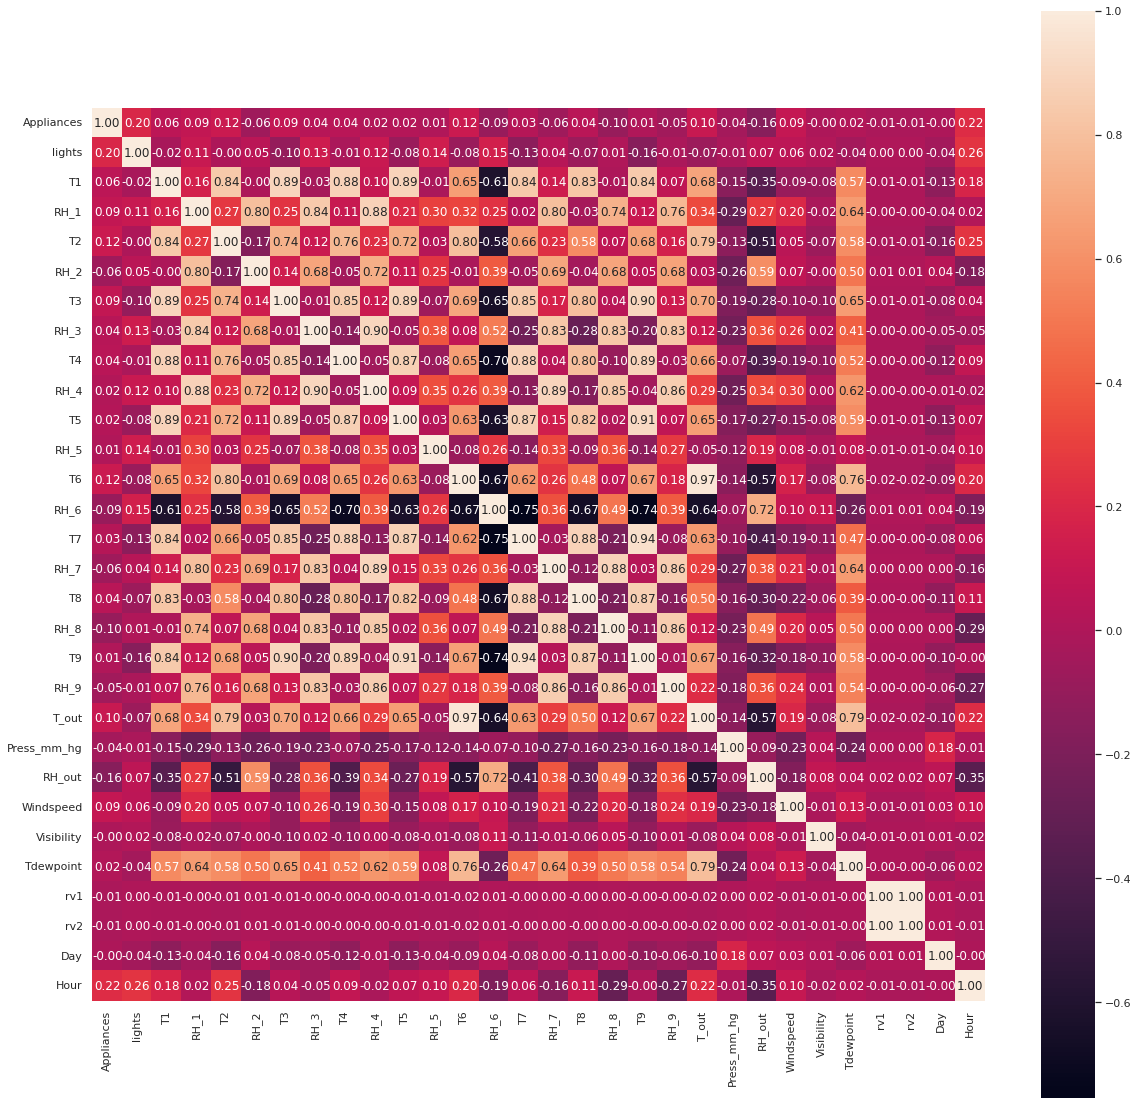

In [29]:
corr = drop_df.corr()
plt.figure(figsize = (20,20))
sns.set(font_scale = 1)
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f')
plt.show()